### 单样本和两样本均值的t检验
#### 单样本（单样本、独立样本、配对样本？）
用来自同一正态分布总体$N(\mu,\delta^2)$的独立观测值来检验总体均值是否为某预想值：
$$H_0:\mu=\mu_0$$, $$H_1:\mu!=\mu_0$$
检验统计量为:
$$t=\cfrac{X^--\mu_0}{\cfrac{s}{\sqrt[2]{n}'}}$$
$X^-$为样本均值，s为样本标准差（自由度=n-1），统计量在零假设下服从自由度为n-1的t分布。
#### 两样本
来自两个正态分布总体的独立观测值，检验两个总体均值是否相等：
$$H_0:\mu_1=\mu_2$$, $$H_1:\mu!=\mu_2$$
检验统计量为：
$$t=\cfrac{X^--Y^-}{\sqrt[2]{\cfrac{s_1^2}{n_1}+\cfrac{s_2^2}{n_2}}'}$$
$s_1$和$s_2$分别为2样本的标准差，自由度为$n_1-1$和$n_2-1$，统计量在零假设下服从自由度为v的t分布：
$$v=\cfrac{(s_1^2/n_1+s_2^2/n_2)^2}{(s_1^2/n_1)^2/(n_1-1)+(s_2^2/n_2)^2/(n_2-1)}$$

### 统计学简单复习

#### 单个总体均数的假设检验（one-sample）
从一个总体随机抽取样本，对**未知**的总体平均数与某个**已知**的特定值比较，检验是否相等；
* 总体方差已知：用**Z检验**（服从标准正态分布的检验统计量Z）
* 总体方差未知：用**t检验**（服从自由度为n-1的t分布）

#### 两个总体均数的假设检验
##### independent-samples
从两个总体分别随机抽取样本，检验两总体均数是否相等；
* 两总体方差已知：用**Z检验**
* 两总体方差未知，且相等：用**t检验**（服从自由度为$n_1+n_2-2$的t分布）
* 两总体方差未知，且不等时，用**校正t检验**（服从自由度小于$n_1+n_2-2$的t分布）

##### paired-samples
先将参加试验的个体两两配对，再将每一个对子内的两个个体独立随机地接受两个处理中的一种。（配对者初始条件应尽可能一致）==**已知总体均数为0的单个总体均数假设检验**

##### 执行步骤
正态性检验（p>0.05）→检验两方差相等性：

1.显著(p<=0.05)=校正t检验

2.不显著(p>0.05)=t检验

##### 方差同质性检验
Hartley F检验，要求 所有样本的含量均相等；

Cochran检验，适用 某个样本方差明显大于其他样本方差；

Bartlett检验，适用 检验不同正态总体的方差同质性，可用于样本含量不等情形；**对非正态性敏感**

F-test，**对非正态性极其敏感**

Levene test，**对非正态性不敏感**

In [1]:
#单样本和两样本均值检验
import scipy.stats as stats
import numpy as np
np.random.seed(100)
x=np.random.normal(3,1,500)
y=np.random.normal(3.2,1,500)
stat,p_value=stats.ttest_1samp(x,3.1)
stat2,p_value2=stats.ttest_ind(x,y,equal_var=False) #不假定二者方差相等
print('1 samp test: stat={},p={}'.format(stat,p_value))
print('2 samp test: stat={},p={}'.format(stat2,p_value2))

1 samp test: stat=-2.2800755266700263,p=0.023024247326446163
2 samp test: stat=-2.6778343704127923,p=0.0075317461063715285


In [5]:
#关于总体比例的检验（检验Bernoulli试验中，成功的概率p是否等于预想的p0）
#假定成功概率为p0，实验中n次下成功x次，检验在n=1000,x=45时是否能说p=0.06
stats.binom_test(x=45,n=1000,p=0.06,alternative='less') 
stats.binom.cdf(45,1000,0.06)                         #效果等同

0.023206423480015746

chisq=11.37452118903212,p-value=0.9105966619328724


KstestResult(statistic=0.12903975019298514, pvalue=9.672508345946258e-73)

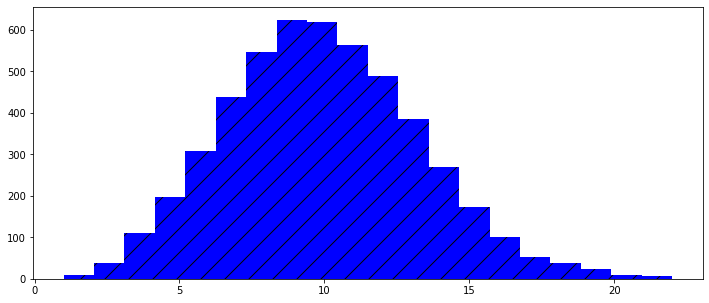

In [15]:
#拟合优度的卡方检验
#检验一组样本观测值是不是来自一个已知分布的总体
import matplotlib.pyplot as plt
size=5000
x=stats.poisson.rvs(10,size=size,random_state=1010)     #随机生成5000个参数为10的泊松分布随机数
fig=plt.figure(figsize=(12,5))
H=plt.hist(x,20,color='blue',hatch='/')
E=np.diff(stats.poisson.cdf(H[1],10))*size              #根据参数为10的泊松分布变量在这些格子中的概率计算出对应期望E
O=H[0]
chisq,p=stats.chisquare(f_obs=O,f_exp=E)
print('chisq={},p-value={}'.format(chisq,p))

stats.kstest(x,lambda x : stats.poisson.cdf(x,10))        #Kolmogorov-Smirnov检验

In [16]:
#求线性相关系数
np.random.seed(1010)
x=np.random.normal(1,1,30)
y=20+x*2+np.random.uniform(10,15,30)
print(stats.spearmanr(x,y)[0])         #Spearman相关系数
print(stats.kendalltau(x,y)[0])        #Kendall相关系数
print(stats.pearsonr(x,y))             #Pearson相关系数；第2个值是相关系数是否=0的假设检验的p值

0.7913236929922135
0.6183908045977011
(0.8473538029578904, 3.501079933334665e-09)
